In [429]:
import warnings
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [430]:
data = pd.read_csv('../data/Admission_Predict.csv', sep=",")

In [431]:
dataset_name = "Admission Predict"
data.shape

(400, 9)

In [432]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [433]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Характеристики датасета для кластеризации

In [434]:
# Выбрано 2 числовых признака
cluster_dataset = pd.DataFrame(columns=['GRE Score', 'TOEFL Score'])
cluster_dataset['GRE Score'] = data['GRE Score']
cluster_dataset['TOEFL Score'] = data['TOEFL Score']

In [435]:
cluster_dataset.shape

(400, 2)

In [436]:
cluster_dataset

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103
...,...,...
395,324,110
396,325,107
397,330,116
398,312,103


In [437]:
cluster_true_y = data['Research']

In [438]:
cluster_true_y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Research, Length: 400, dtype: int64

In [439]:
print(np.unique(cluster_true_y))

[0 1]


### Визуализация кластеров

In [440]:
cluster_n_samples = 400

def visualize_clusters(cluster_dataset, cluster_result):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(15,15))
    plot_num = 0
    plot_num += 1
    plt.subplot(2, 3, plot_num)
    # Цвета точек как результат кластеризации
    colors = pd.np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(cluster_result) + 1))))
    # черный цвет для выделяющихся значений
    colors = np.append(colors, ["#000000"])
    plt.scatter(cluster_dataset['GRE Score'], cluster_dataset['TOEFL Score'], s=3, color=colors[cluster_result])
    plt.xticks(())
    plt.yticks(())
    plt.title(dataset_name)
    
    plt.show()

In [441]:
cluster_results_empty = np.zeros(cluster_n_samples, dtype=int)

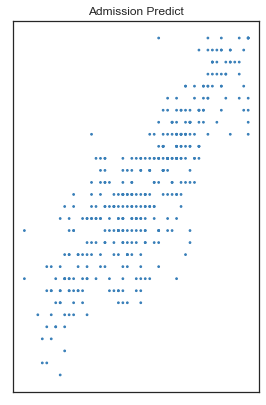

In [442]:
# Нет кластеров
visualize_clusters(cluster_dataset, cluster_results_empty)

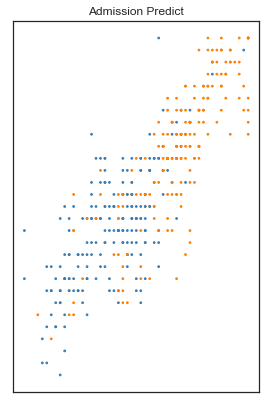

In [443]:
# Эталонные значения кластеров
visualize_clusters(cluster_dataset, cluster_true_y)

### Метод К-средних (K-Means)

In [444]:
def do_clustering(cluster_datasets, method):
    """
    Выполнение кластеризации для данных
    """
    cluster_result = method.fit_predict(cluster_dataset)
    return cluster_result

In [445]:
result_KMeans_plus_3 = do_clustering(cluster_dataset, KMeans(n_clusters=3, init='k-means++'))

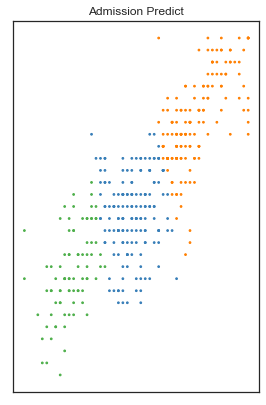

In [446]:
visualize_clusters(cluster_dataset, result_KMeans_plus_3)

##### Подбор гиперпараметра

Text(0, 0.5, '$J(C_k)$')

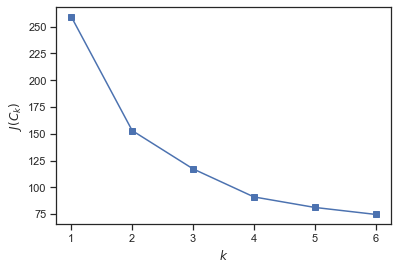

In [447]:
inertia = []
TEMP_X = cluster_dataset
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(TEMP_X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 7), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [448]:
result_KMeans_plus_2 = do_clustering(cluster_dataset, KMeans(n_clusters=2, init='k-means++'))

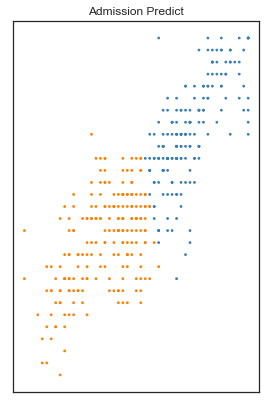

In [449]:
visualize_clusters(cluster_dataset, result_KMeans_plus_2)

In [450]:
warnings.simplefilter(action='ignore', category=FutureWarning)

def claster_metrics(method, cluster_dataset, cluster_true_y, dataset_name):
    """
    Вычисление метрик кластеризации
    """
    temp_cluster = method.fit_predict(cluster_dataset)
    ari = adjusted_rand_score(cluster_true_y, temp_cluster)
    ami = adjusted_mutual_info_score(cluster_true_y, temp_cluster)
    
    h, c, v = homogeneity_completeness_v_measure(cluster_true_y, temp_cluster)
    
    sl = silhouette_score(cluster_dataset, temp_cluster)
    
    result = pd.DataFrame([{'Datasets':dataset_name, 
                            'AMI':ami, 
                            'Homogeneity':h, 
                            'Completeness':c, 
                            'V-measure':v, 
                            'Silhouette':sl, 
                            'ARI':ari}])
    return result
    

In [451]:
# Вычисление метрик для KMeans
claster_metrics(KMeans(n_clusters=2, init='k-means++'), cluster_dataset, cluster_true_y, dataset_name)

,Datasets,AMI,Homogeneity,Completeness,V-measure,Silhouette,ARI
0,Admission Predict,0.269787,0.271706,0.270525,0.271114,0.535197,0.334735


### DBSCAN

In [452]:
result_DBSCAN = do_clustering(cluster_dataset, DBSCAN(eps=1.45))

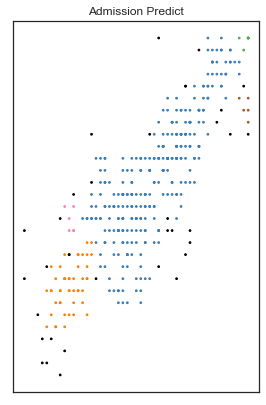

In [453]:
visualize_clusters(cluster_dataset, result_DBSCAN)

In [454]:
# Вычисление метрик для DBSCAN
claster_metrics(DBSCAN(eps=1.45), cluster_dataset, cluster_true_y, dataset_name)


,Datasets,AMI,Homogeneity,Completeness,V-measure,Silhouette,ARI
0,Admission Predict,0.065772,0.083162,0.066629,0.073983,0.063001,0.051323
